In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# SVC for classification through support vector machine
from sklearn.svm import SVC

# importing train test split & GridSearchCV library
from sklearn.model_selection import train_test_split, GridSearchCV

# model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# standardization library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# pipelline libraray
from sklearn.pipeline import Pipeline

# figure parameters
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 200

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:


df = pd.read_csv('SalaryData_Train(1).csv')
df.head()



,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:

#EDA

In [5]:


df.describe()



,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:


df.describe(include = object)



,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
count,30161,30161,30161,30161,30161,30161,30161,30161,30161
unique,7,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22285,9840,14065,4038,12463,25932,20380,27504,22653


In [8]:


df.isna().sum()



age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:


df['workclass'].unique()



array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [10]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [11]:


df['maritalstatus'].unique()



array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [12]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [13]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [14]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [15]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [16]:


df['native'].unique()



array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [17]:
df['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

Text(0.5, 1.0, 'boxplot')

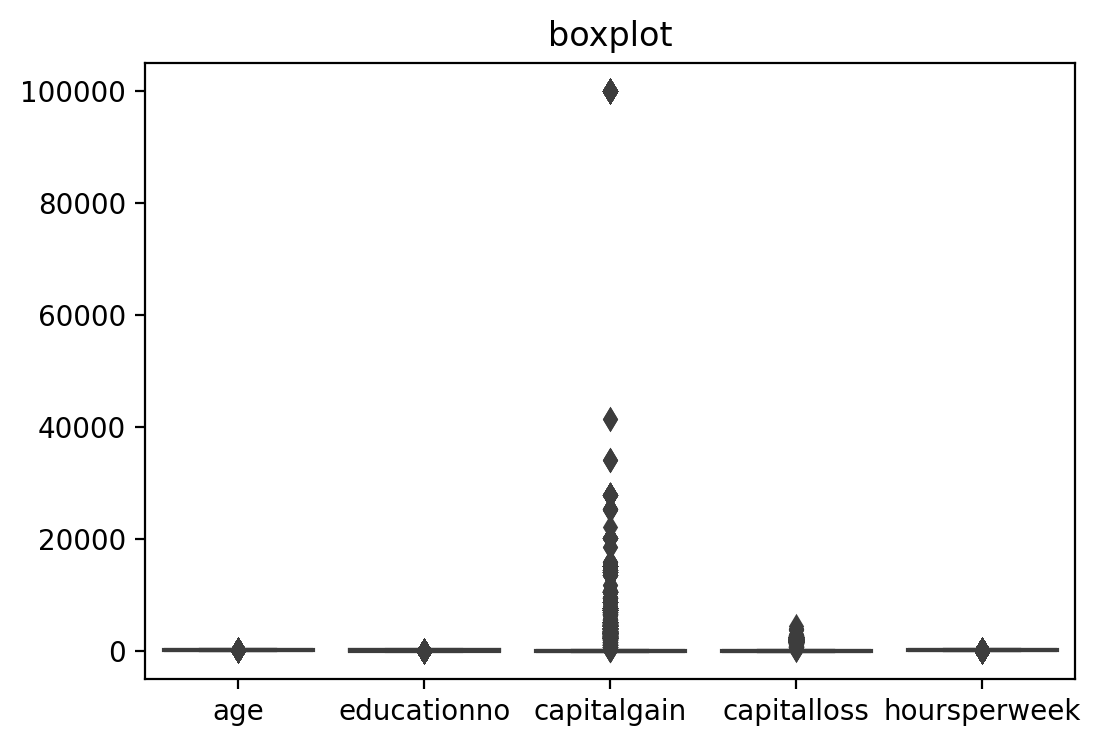

In [18]:


sns.boxplot(data = df)
plt.title('boxplot')



Text(0.5, 1.0, 'zoomed-in boxplot')

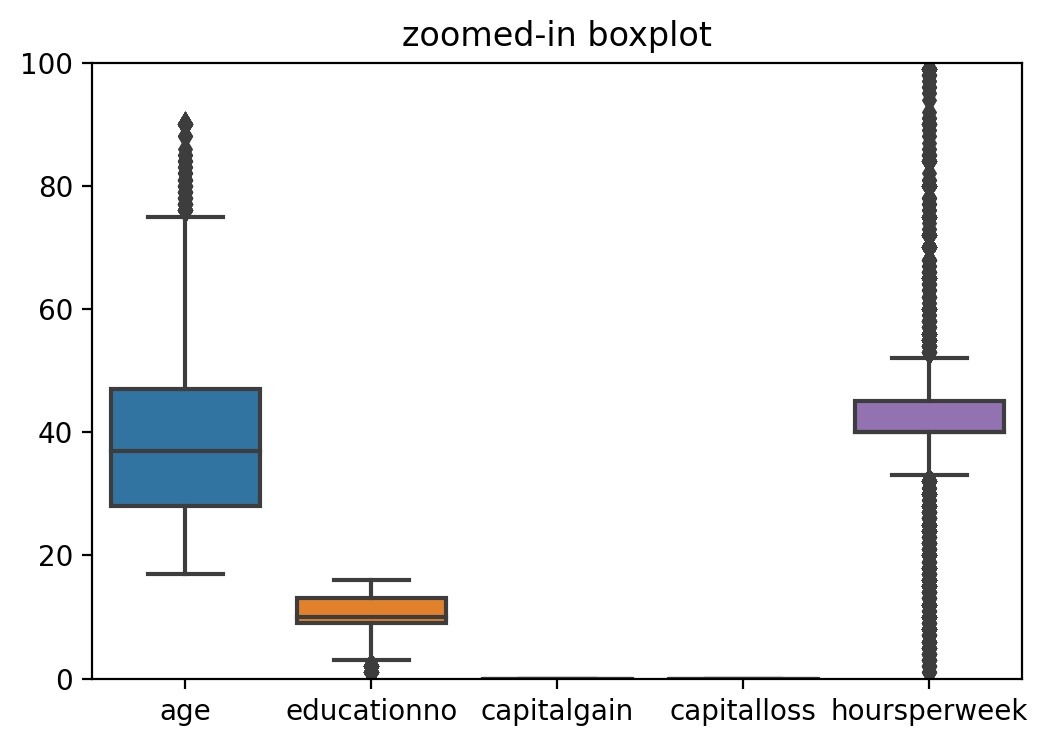

In [19]:


sns.boxplot(data = df)
plt.ylim(0,100)
plt.title('zoomed-in boxplot')



Text(0.5, 1.0, 'outlier removed train data boxplot')

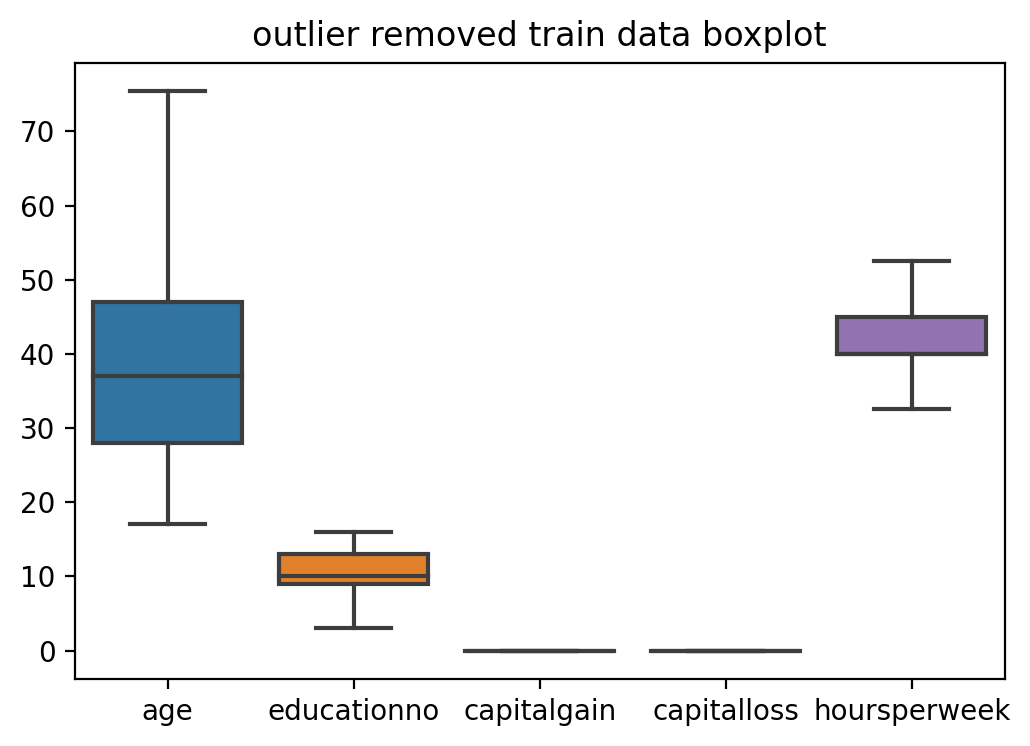

In [20]:
def outlier_remove(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    df.loc[df[col]>upper,col] = upper
    df.loc[df[col]<lower,col] = lower
outlier_remove(df = df,col = 'age')
outlier_remove(df = df,col = 'educationno')
outlier_remove(df = df,col = 'capitalgain')
outlier_remove(df = df,col = 'capitalloss')
outlier_remove(df = df,col = 'hoursperweek')

sns.boxplot(data = df)
plt.title('outlier removed train data boxplot')



In [21]:

#Visualizations

In [22]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,<=50K
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


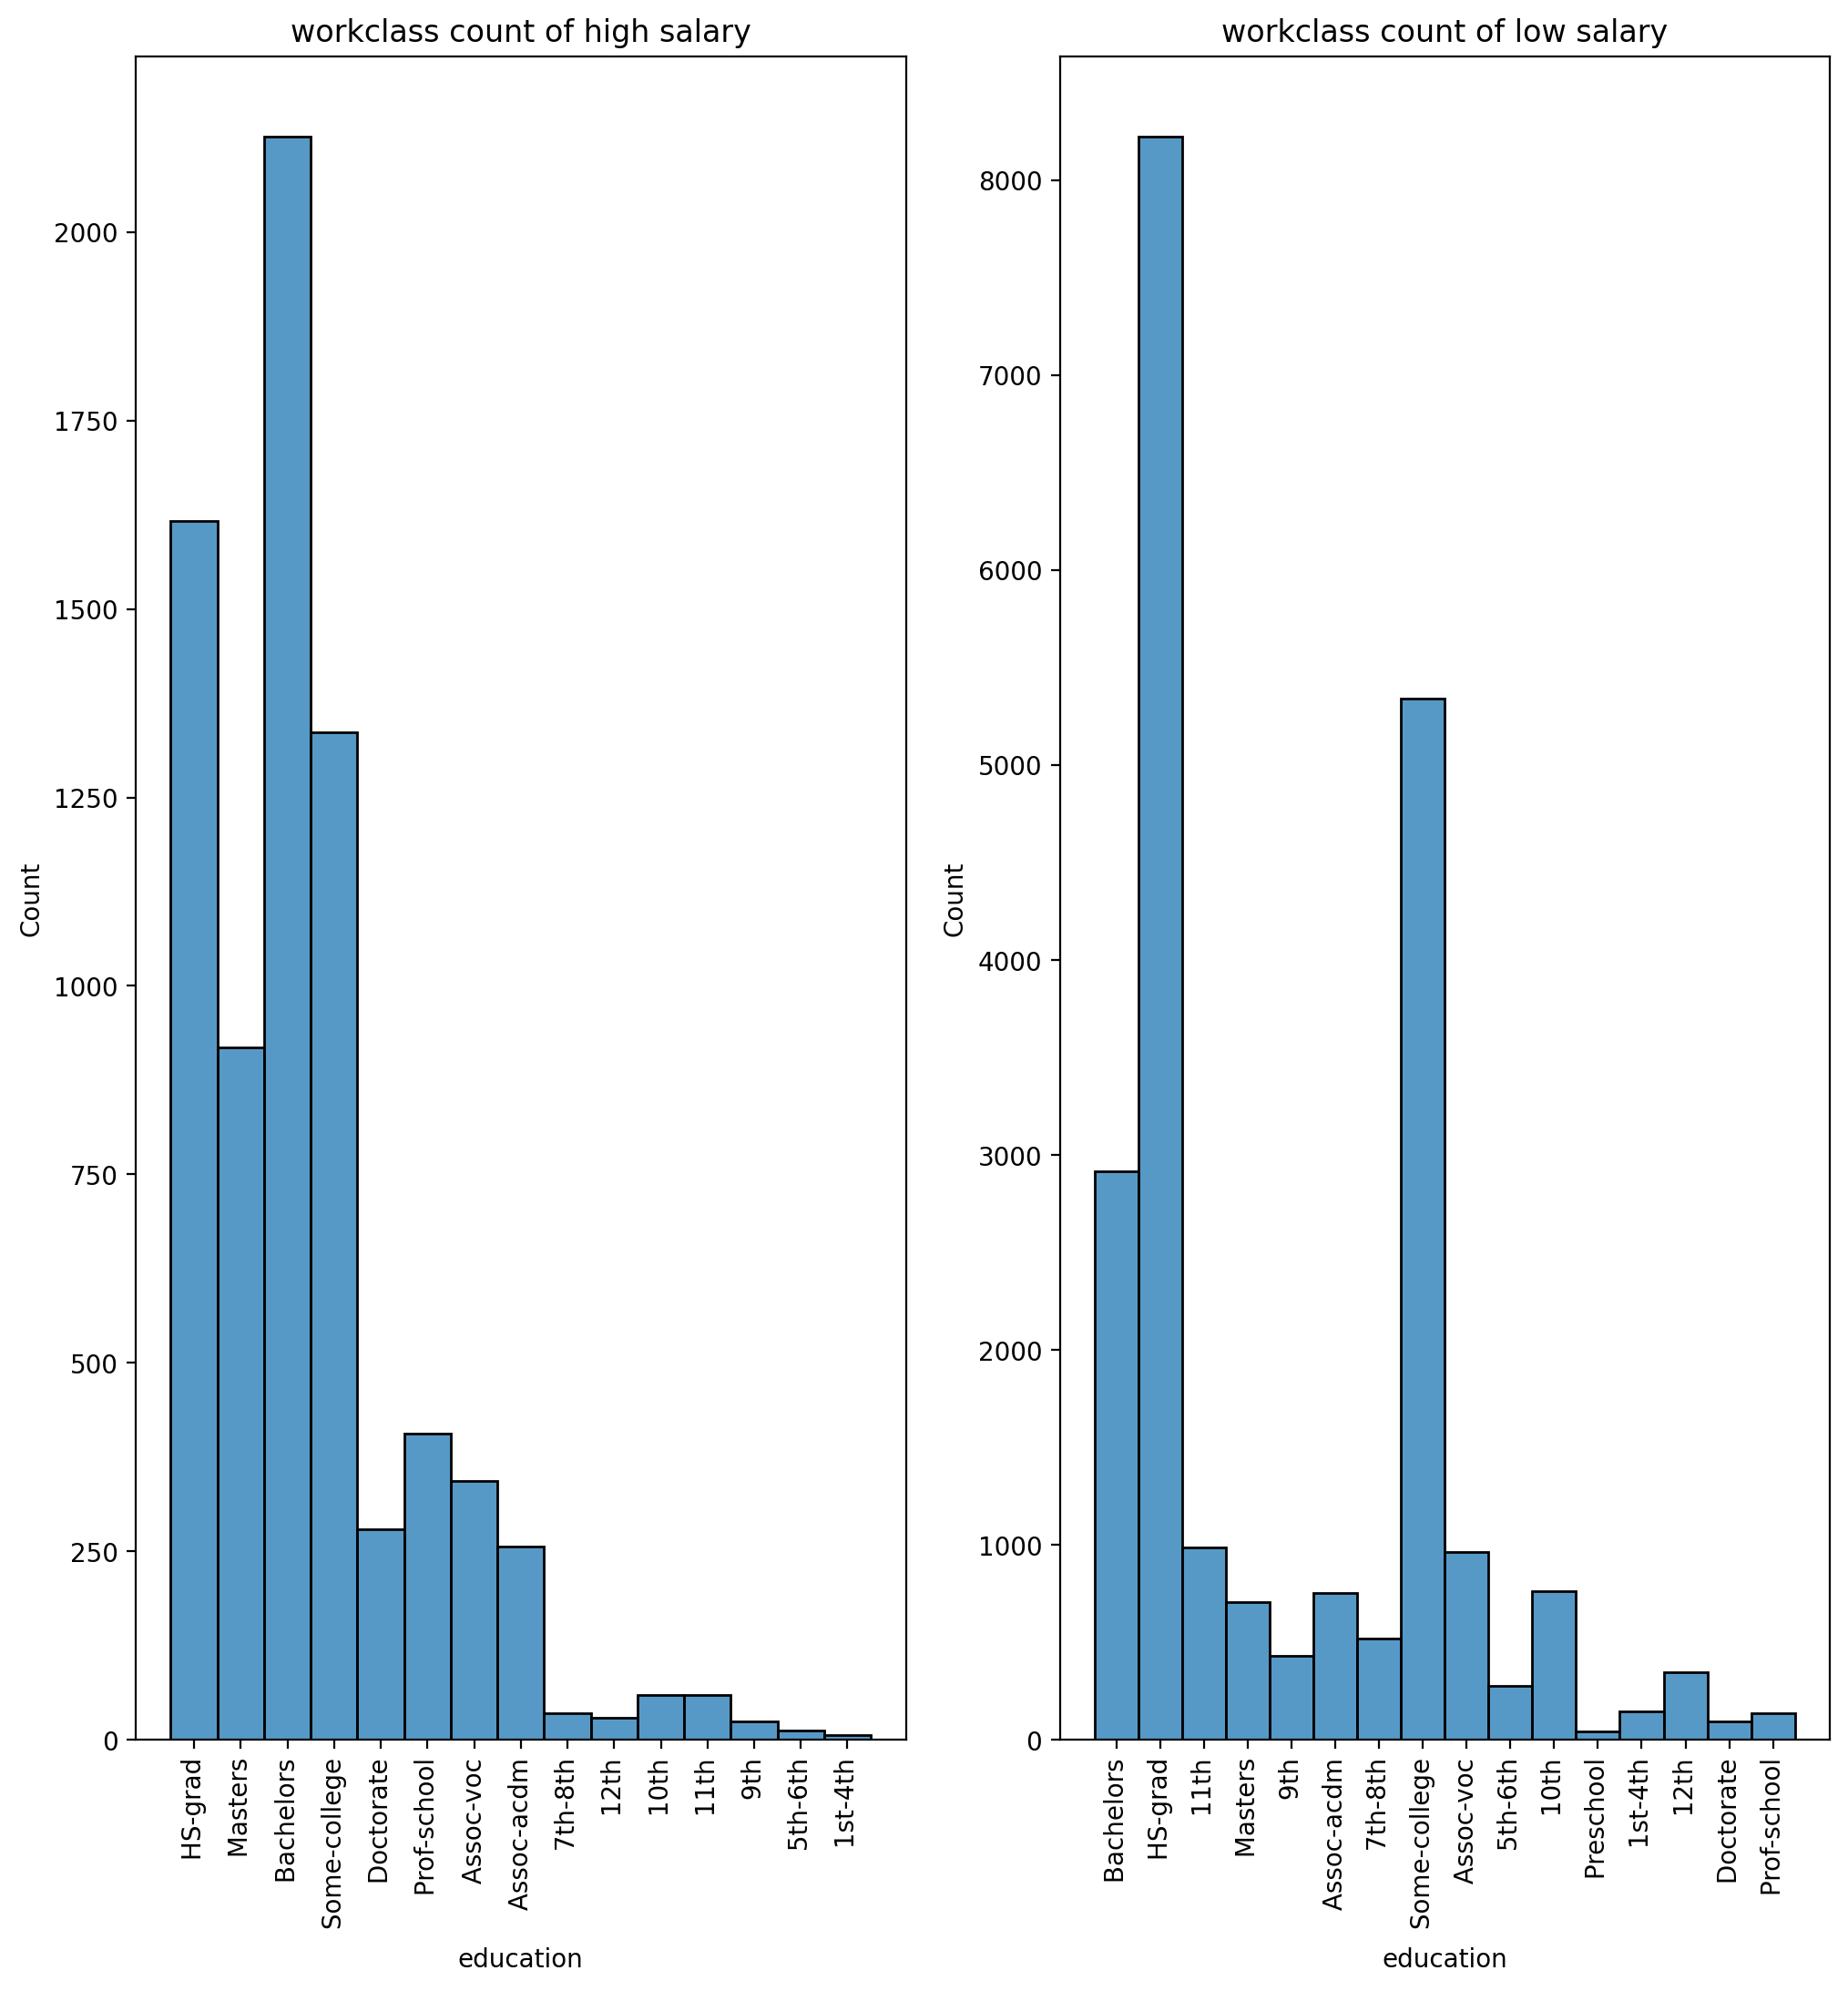

In [23]:
high_sal = df[df['Salary'] == ' >50K']
low_sal = df[df['Salary'] == ' <=50K']

plt.figure(figsize = (12,12))
plt.subplot(1,2,1)
sns.histplot(data = high_sal, x = 'education')
plt.xticks(rotation = 90)
plt.title('workclass count of high salary')

plt.subplot(1,2,2)
sns.histplot(data = low_sal, x = 'education')
plt.xticks(rotation = 90)
plt.title('workclass count of low salary')
plt.show()



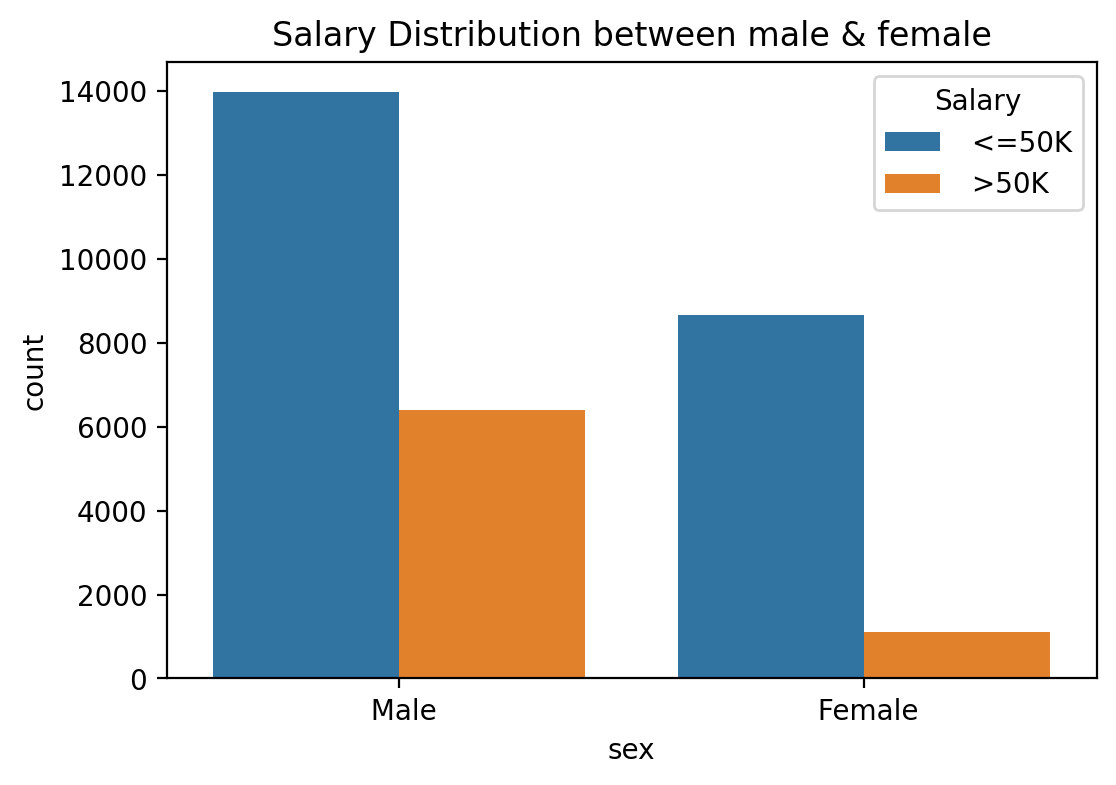

In [24]:
sns.countplot(data = df, x = 'sex', hue = 'Salary')
plt.title('Salary Distribution between male & female')
plt.show()

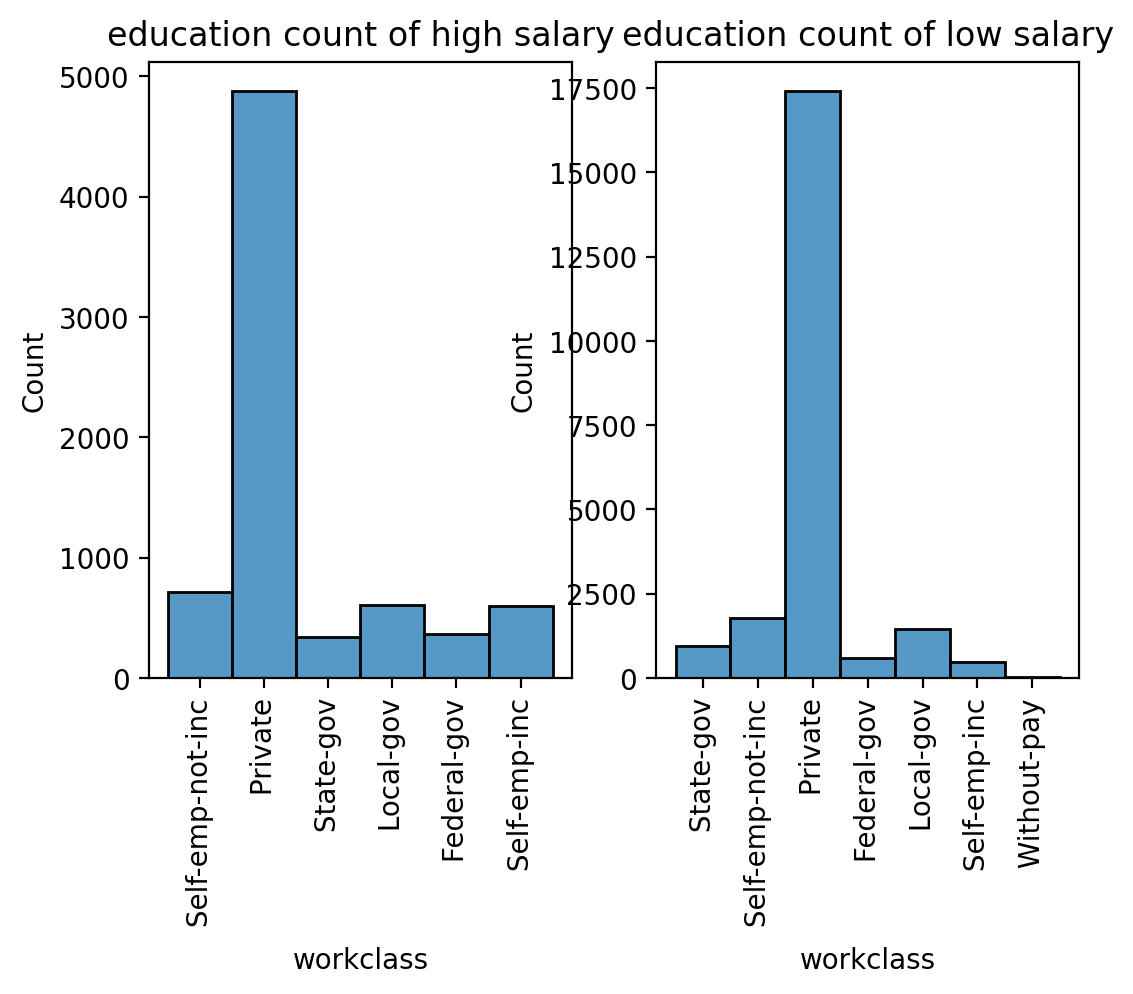

In [25]:
plt.subplot(1,2,1)
sns.histplot(data = high_sal, x = 'workclass')
plt.xticks(rotation = 90)
plt.title('education count of high salary')
plt.subplot(1,2,2)
sns.histplot(data = low_sal, x = 'workclass')
plt.xticks(rotation = 90)
plt.title('education count of low salary')
plt.show()

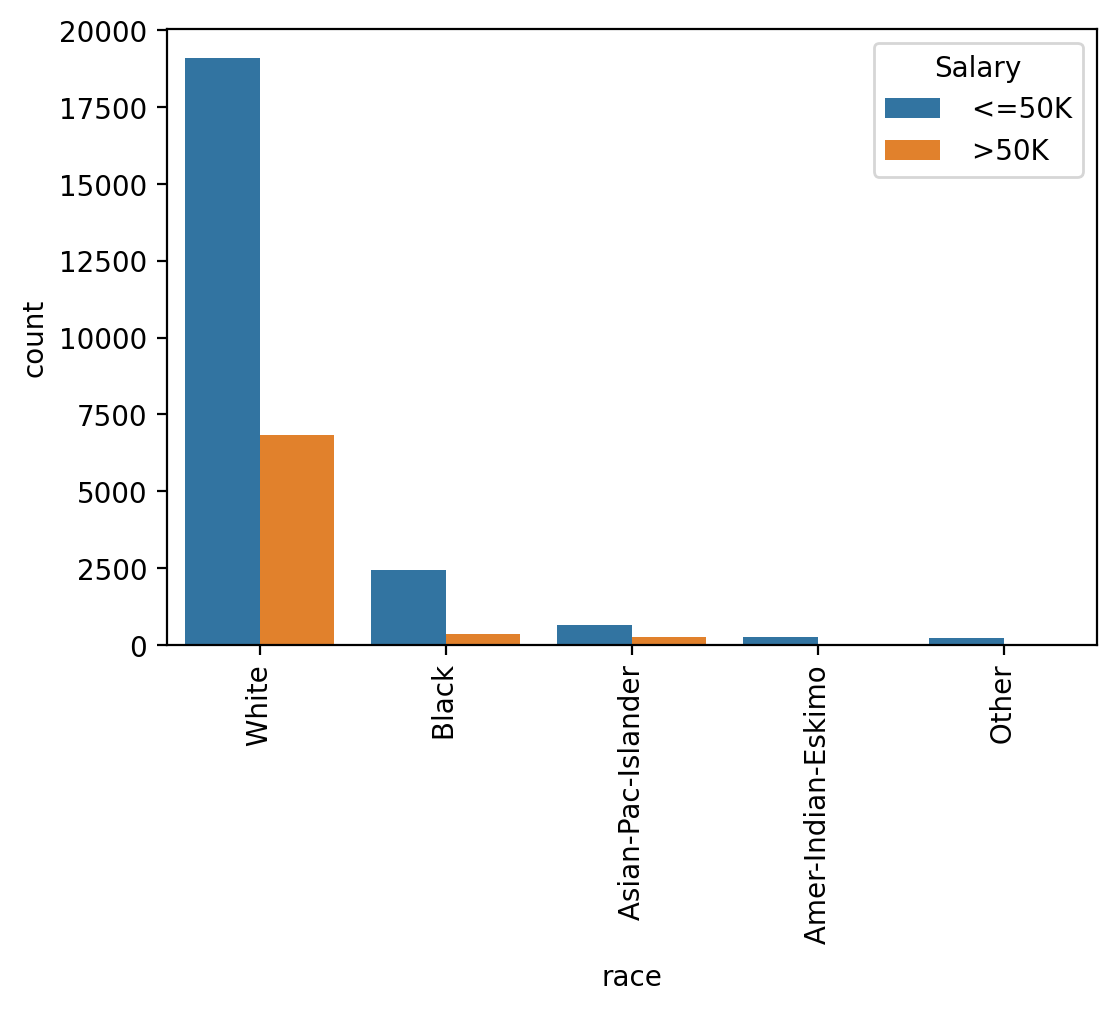

In [26]:


sns.countplot(data = df, x = 'race', hue = "Salary")
plt.xticks(rotation = 90)
plt.show()



In [27]:


#Label Encoding


from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column contains categorical data
        df[col] = label_encoder.fit_transform(df[col])

df.head()



,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39.0,5,9,13,4,0,1,4,1,0,0,40.0,37,0
1,50.0,4,9,13,2,3,0,4,1,0,0,32.5,37,0
2,38.0,2,11,9,0,5,1,4,1,0,0,40.0,37,0
3,53.0,2,1,7,2,5,0,2,1,0,0,40.0,37,0
4,28.0,2,9,13,2,9,5,2,0,0,0,40.0,4,0


In [28]:


for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")



Unique values in 'age': [39.  50.  38.  53.  28.  37.  49.  52.  31.  42.  30.  23.  32.  34.
 25.  43.  40.  54.  35.  59.  56.  19.  20.  45.  22.  48.  21.  24.
 57.  44.  41.  29.  47.  46.  36.  75.5 27.  18.  33.  55.  61.  70.
 64.  71.  66.  51.  58.  26.  17.  60.  75.  65.  62.  63.  67.  74.
 72.  69.  68.  73. ]
Unique values in 'workclass': [5 4 2 0 1 3 6]
Unique values in 'education': [ 9 11  1 12  6 15  7  5 10  8 14  4  0 13  2  3]
Unique values in 'educationno': [13  9  7 14  5 10 12  4 16 11 15  3  6  8]
Unique values in 'maritalstatus': [4 2 0 3 5 1 6]
Unique values in 'occupation': [ 0  3  5  9  7 11 13  4  6 12  2 10  1  8]
Unique values in 'relationship': [1 0 5 3 4 2]
Unique values in 'race': [4 2 1 0 3]
Unique values in 'sex': [1 0]
Unique values in 'capitalgain': [0]
Unique values in 'capitalloss': [0]
Unique values in 'hoursperweek': [40.  32.5 45.  50.  52.5 35.  52.  44.  43.  38.  48.  41.  36.  46.
 42.  34.  33.  47.  37.  39.  49.  51. ]
Unique values in

<Axes: >

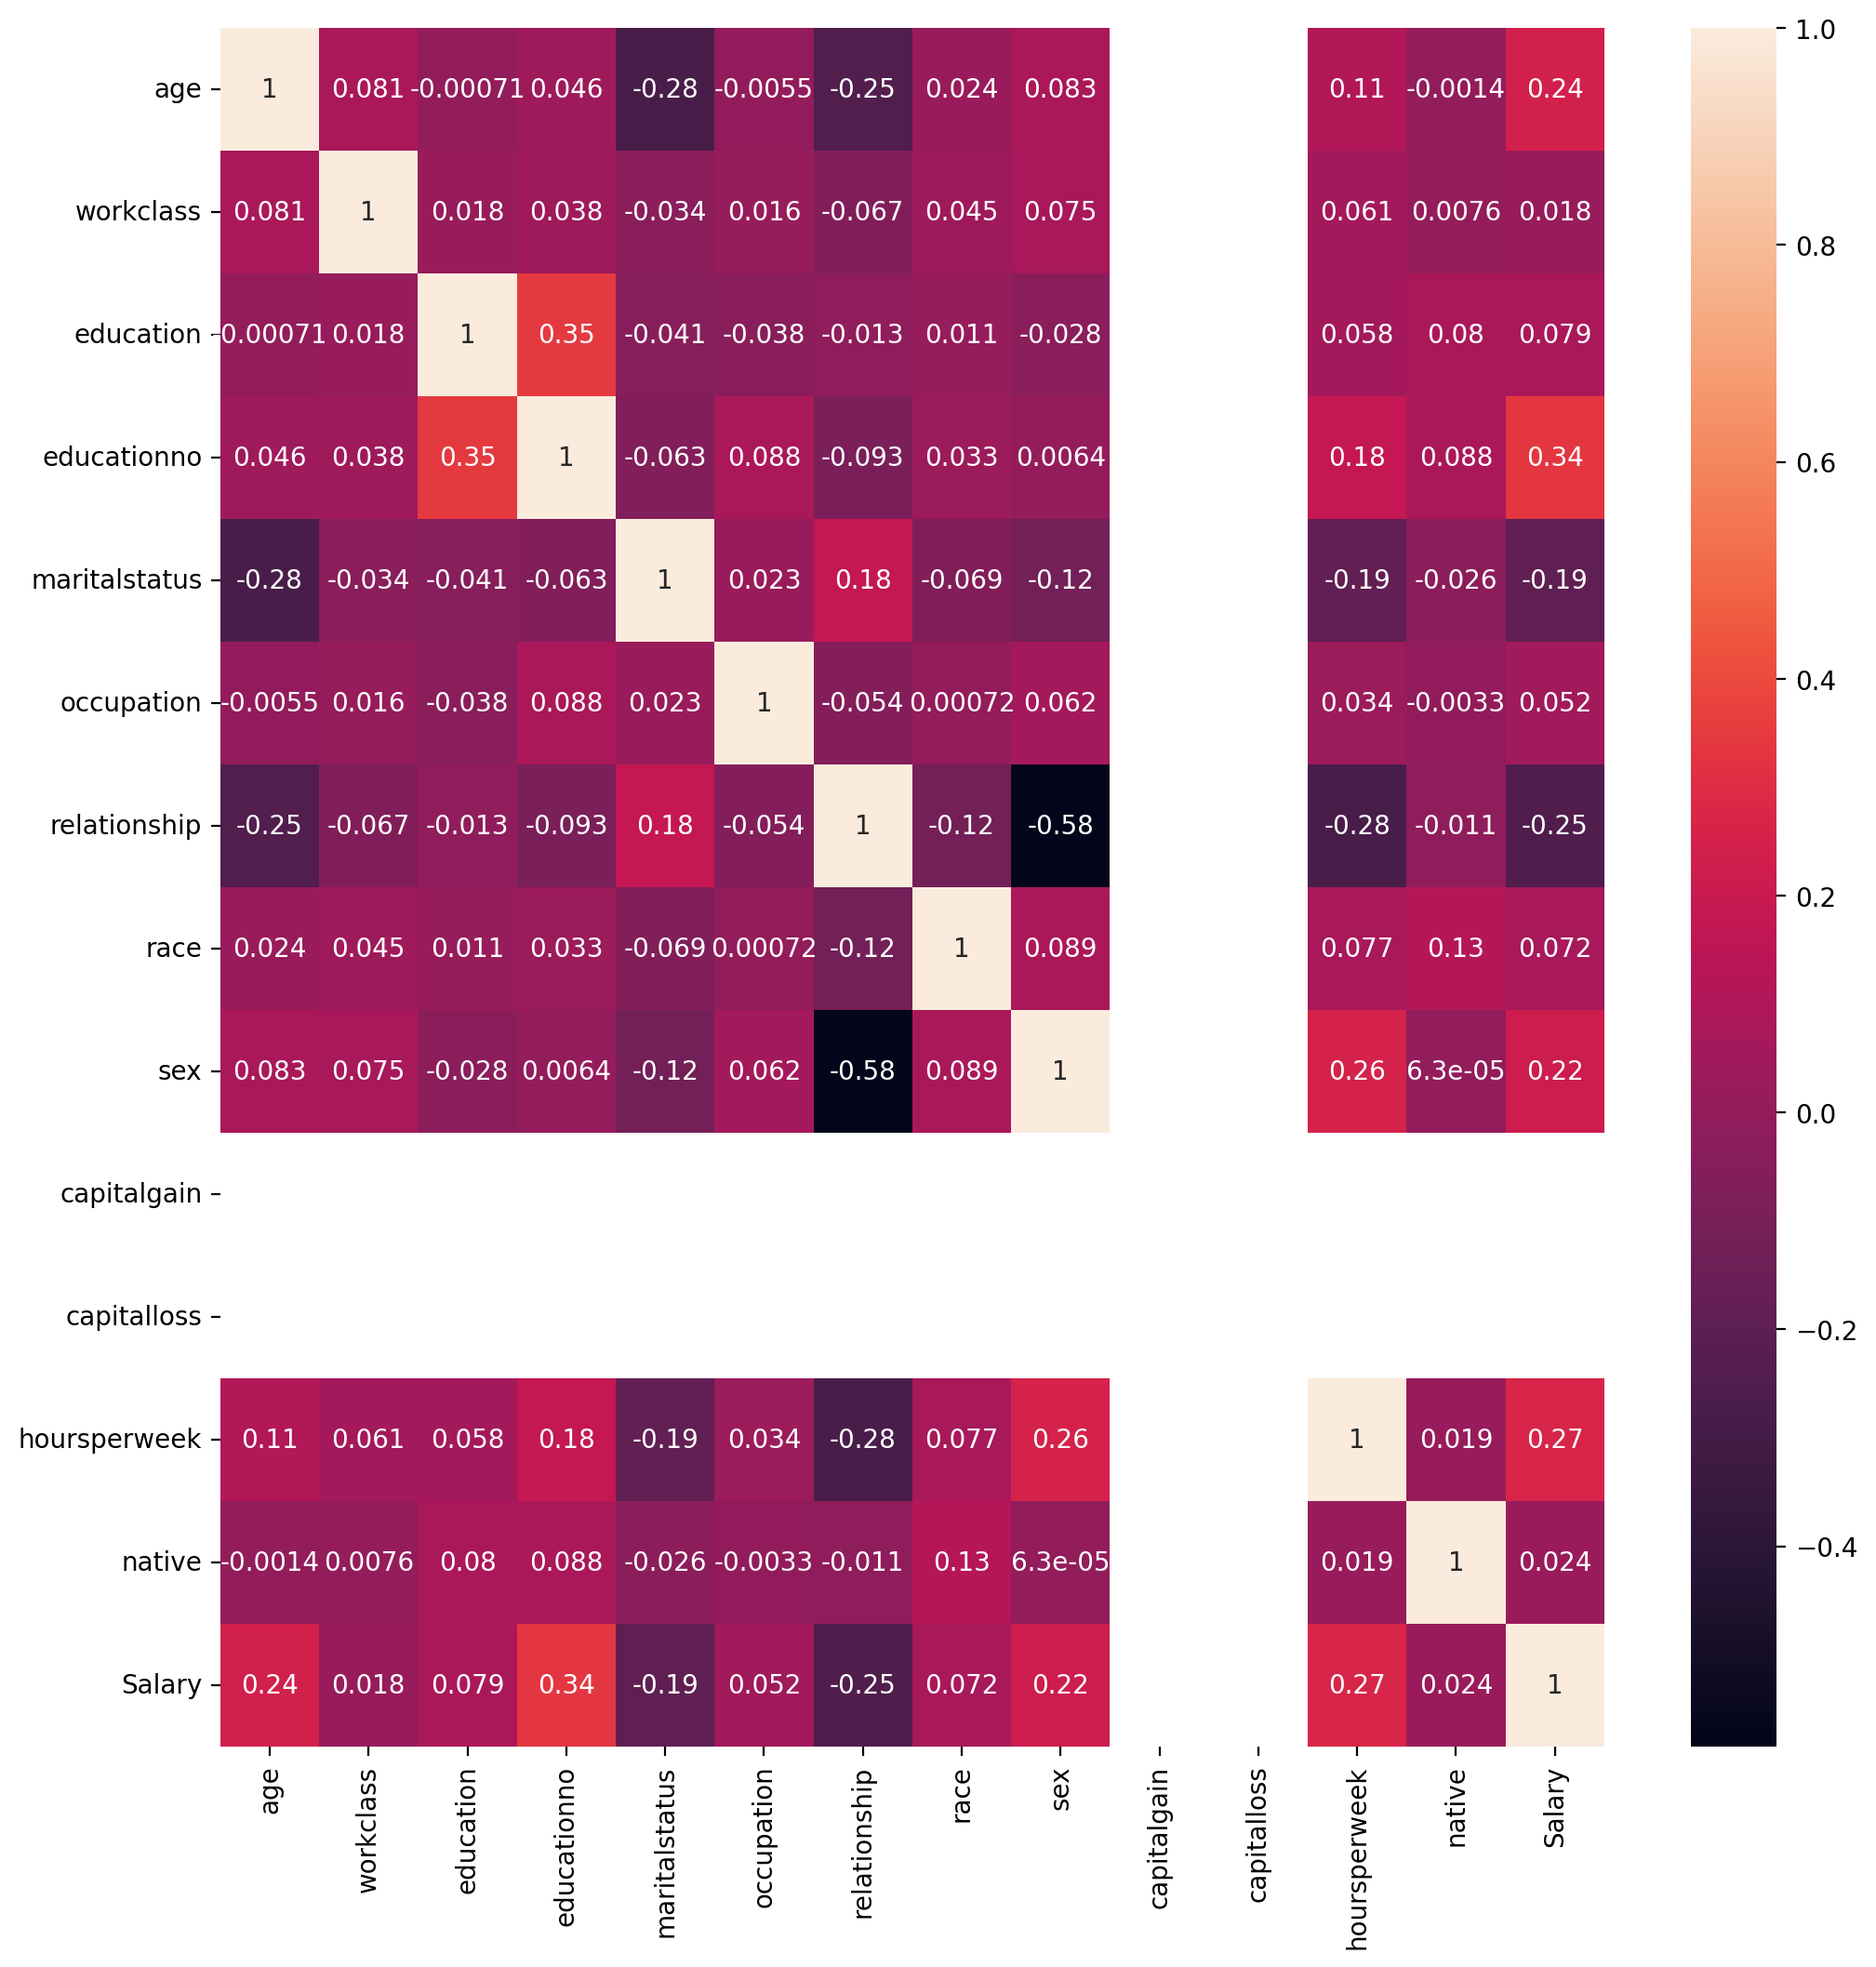

In [29]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot=True)

In [30]:


df.drop('capitalloss', inplace=True, axis = 1)
df.drop('capitalgain', inplace=True, axis = 1)

df



,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,39.0,5,9,13,4,0,1,4,1,40.0,37,0
1,50.0,4,9,13,2,3,0,4,1,32.5,37,0
2,38.0,2,11,9,0,5,1,4,1,40.0,37,0
3,53.0,2,1,7,2,5,0,2,1,40.0,37,0
4,28.0,2,9,13,2,9,5,2,0,40.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27.0,2,7,12,2,12,5,4,0,38.0,37,0
30157,40.0,2,11,9,2,6,0,4,1,40.0,37,1
30158,58.0,2,11,9,6,0,4,4,0,40.0,37,0
30159,22.0,2,11,9,4,0,3,4,1,32.5,37,0


In [31]:
preprocessed_train_df = df
preprocessed_train_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,39.0,5,9,13,4,0,1,4,1,40.0,37,0
1,50.0,4,9,13,2,3,0,4,1,32.5,37,0
2,38.0,2,11,9,0,5,1,4,1,40.0,37,0
3,53.0,2,1,7,2,5,0,2,1,40.0,37,0
4,28.0,2,9,13,2,9,5,2,0,40.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27.0,2,7,12,2,12,5,4,0,38.0,37,0
30157,40.0,2,11,9,2,6,0,4,1,40.0,37,1
30158,58.0,2,11,9,6,0,4,4,0,40.0,37,0
30159,22.0,2,11,9,4,0,3,4,1,32.5,37,0


In [32]:
# Store the DataFrame in the IPython database | used into another notebook
%store preprocessed_train_df

Stored 'preprocessed_train_df' (DataFrame)
